In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
import numpy as np
import pandas as pd
%matplotlib inline

Text(0, 0.5, 'Viagra')

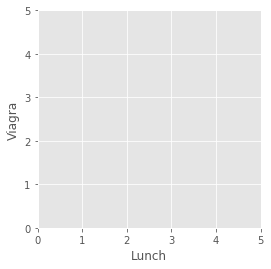

In [16]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_xlim(0, 5)
ax.set_xlabel('Lunch')
ax.set_ylim(0, 5)
ax.set_ylabel('Viagra')


In [10]:
dir(ax)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_cachedRenderer',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_current_image',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_hold',
 '_in_layout',
 '_init_axis',
 '_label',
 '_layoutbox',
 '_left_title',
 '_make_twin_axes',
 '_mouseover',
 '_m

In [ ]:
documents = [
    """From: Martha Washington <marthafirst@hotmail.com>
Subject: Lunch
Date: January 25, 1794 9:30:58 AM EST
To: George Washington <president@whitehouse.gov>

Looking forward to lunch at noon today. I reserved my MealPal at Nerds and Nibblers. Please don't forget to book yours. You know how much I hate standing in line.

 xoxo Martha 😻
""",
    """From: Aaron Burr <aabear@aol.com>
Subject: Quality meds, low price, quick delivery!
Date: January 25, 1794 9:35:21 AM EST
To: George Washington <president@whitehouse.gov>

Not dead yet? We have the Viagra that you need!!!

GUARANTEED BEST PRICE VIAGRA! WE HAVE QUICKSILVER TOO!!!

CLICK HERE FOR VIAGRA! ORDER NOW!
http://legit-pharmacy.ru/viagra-deals?ref=aabear

""",
    
]